In [15]:
#librerias para el desarrollo del proyecto
import matplotlib.pyplot as plt #libreria para graficas
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.ticker import StrMethodFormatter
import seaborn as sb

#librerias pandas para el manejo de los datos
import pandas as pd
import pandas as pq
import pandas as pf
import pandas as filtro_filas

#enlazando los datos en el archivo excel
data = pd.read_csv(r"C:/Users/MADDOX/dataset/autism_screening.csv", index_col=None)
import numpy as np
#invocando a la libreria de clasificacion
from sklearn.svm import SVC

In [17]:
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [19]:
data.shape

(704, 21)

In [21]:
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [23]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [24]:
#numero de missing por columnas
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [27]:
#Columnas con missing
null_columns=data.columns[data.isnull().any()]

print(null_columns)

Index(['age'], dtype='object')


<Axes: >

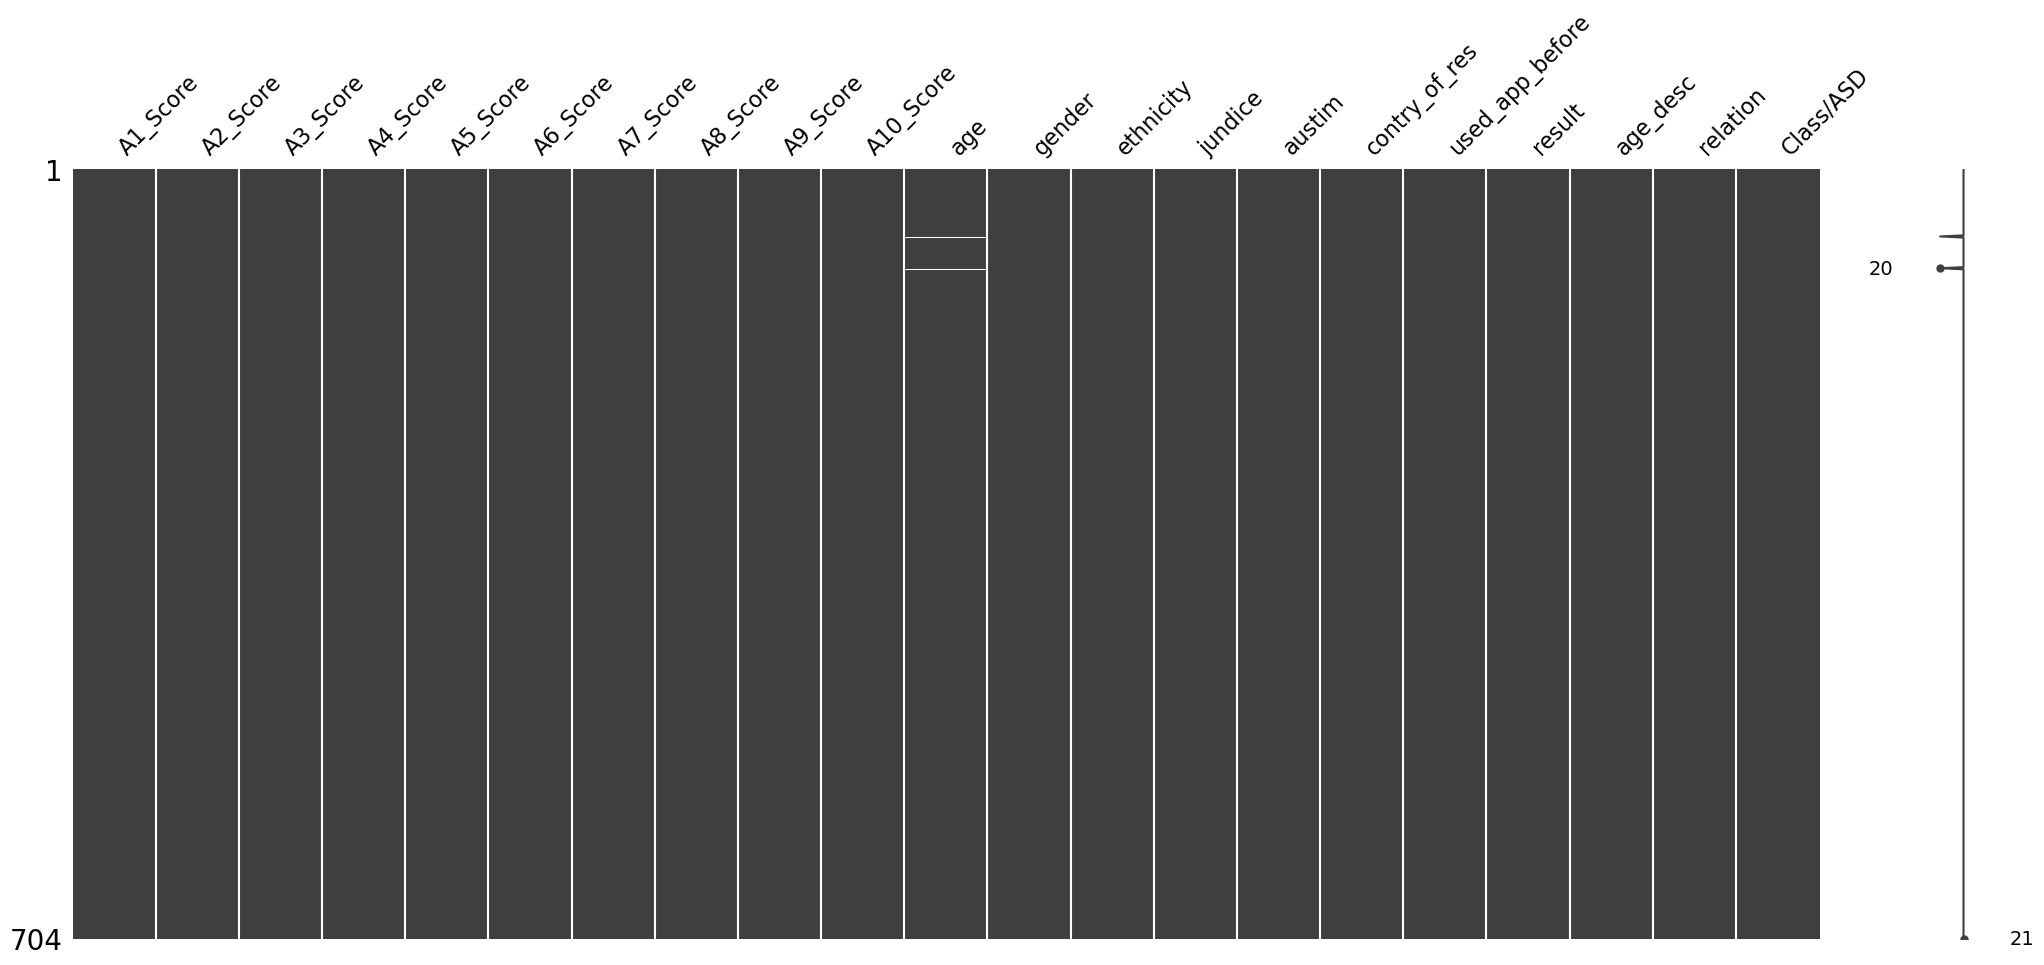

In [29]:
import missingno as msno
msno.matrix(data) 

In [30]:
# captura el numero de filas y columnas
rows = len(data.axes[0])
cols = len(data.axes[1])

# Imprimir el numero de filas y columnas
print("Numero de filas: " + str(rows))
print("Numero de columnas: " + str(cols))

Numero de filas: 704
Numero de columnas: 21


In [31]:
data.isnull().any()

A1_Score           False
A2_Score           False
A3_Score           False
A4_Score           False
A5_Score           False
A6_Score           False
A7_Score           False
A8_Score           False
A9_Score           False
A10_Score          False
age                 True
gender             False
ethnicity          False
jundice            False
austim             False
contry_of_res      False
used_app_before    False
result             False
age_desc           False
relation           False
Class/ASD          False
dtype: bool

In [32]:
#score = clf.score(X_train,y_train)

#https://www.aprendemachinelearning.com/sets-de-entrenamiento-test-validacion-cruzada/

In [33]:
#verificamos la edad de las personas para ver si estan dentro del rango
print(data.groupby('age').size())

age
17.0     18
18.0     31
19.0     35
20.0     46
21.0     49
22.0     37
23.0     37
24.0     34
25.0     27
26.0     28
27.0     31
28.0     24
29.0     27
30.0     30
31.0     21
32.0     18
33.0     16
34.0     12
35.0     17
36.0     13
37.0     17
38.0     12
39.0      7
40.0     16
41.0      3
42.0     15
43.0     11
44.0     10
45.0      4
46.0      6
47.0      8
48.0      4
49.0      3
50.0      5
51.0      1
52.0      5
53.0      6
54.0      2
55.0      6
56.0      2
58.0      2
59.0      1
60.0      1
61.0      2
64.0      1
383.0     1
dtype: int64


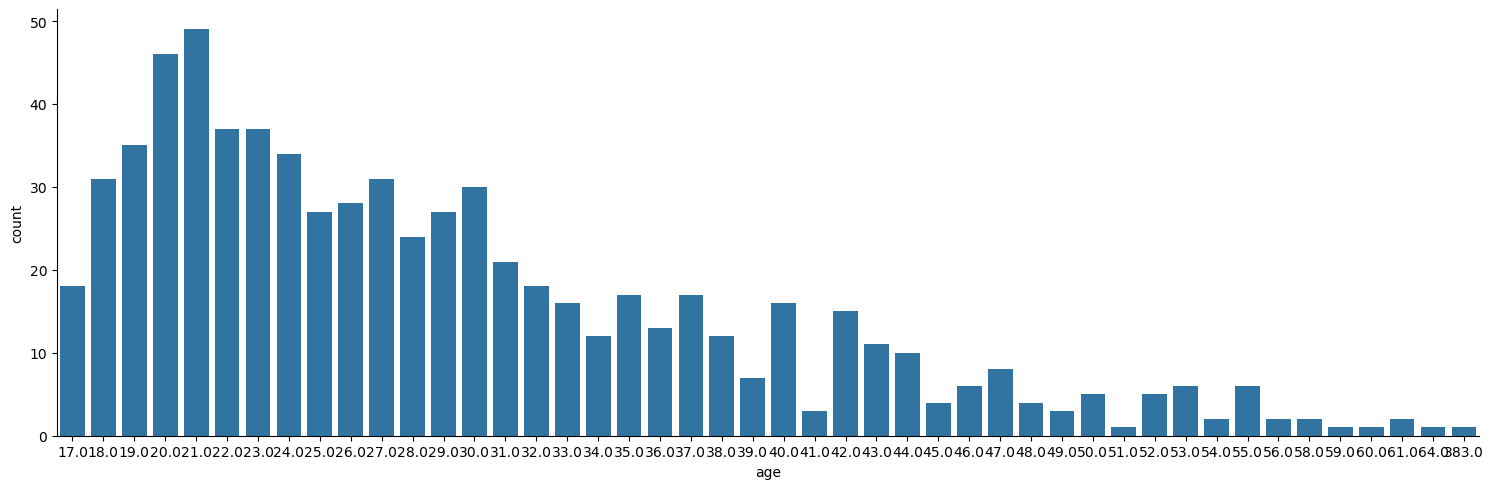

In [34]:
import seaborn as sb

sb.catplot(x='age', data=data, kind="count", aspect=3)


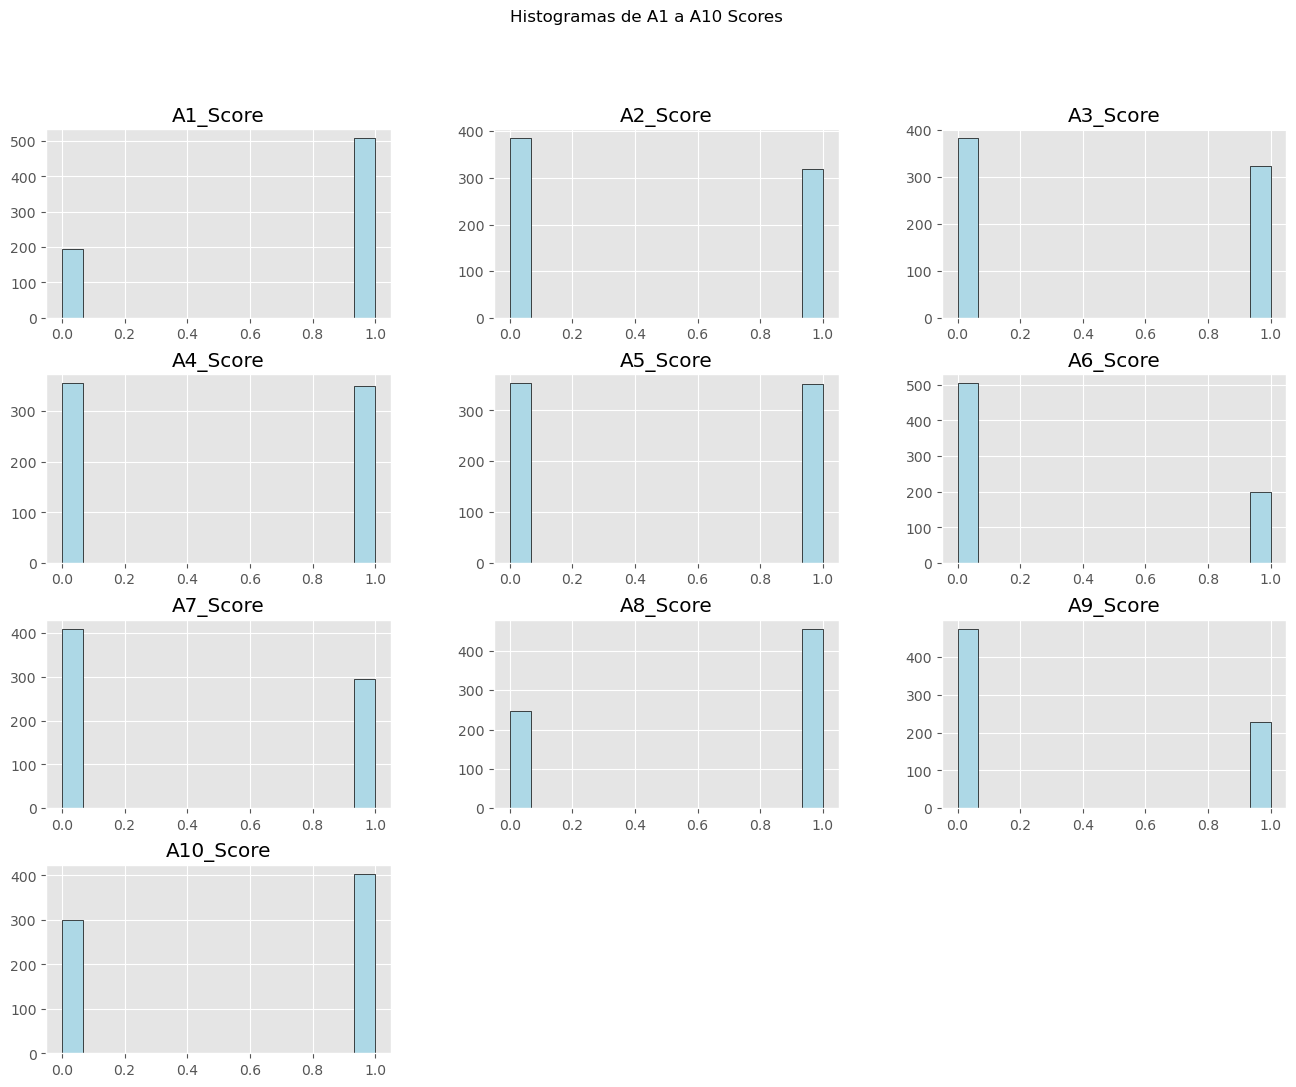

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

# Configuración del tamaño y estilo de la gráfica
plt.rcParams['figure.figsize'] = (16, 12)
plt.style.use('ggplot')

# Lista de columnas a graficar (A1_Score a A10_Score)
columns_to_plot = [f'A{i}_Score' for i in range(1, 11)]  # ['A1_Score', ..., 'A10_Score']

# Filtrar el DataFrame solo con las columnas deseadas
data_to_plot = data[columns_to_plot]

# Crear histogramas para las columnas especificadas
ax = data_to_plot.hist(bins=15, edgecolor='black', color='lightblue')  # Color celeste para las barras

# Mostrar la gráfica
plt.suptitle('Histogramas de A1 a A10 Scores')  # Título general
plt.show()

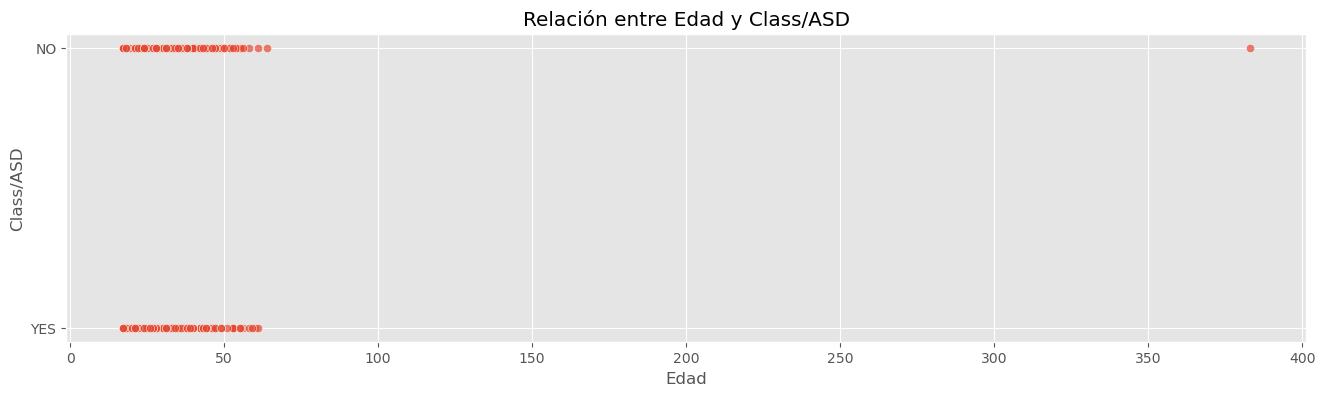

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Configuración del tamaño y estilo de la gráfica
plt.rcParams['figure.figsize'] = (16, 4)
plt.style.use('ggplot')

# Crear el gráfico de dispersión
plt.figure()
sns.scatterplot(x='age', y='Class/ASD', data=data, alpha=0.7)  # alpha para la transparencia de los puntos

# Añadir título y etiquetas
plt.title('Relación entre Edad y Class/ASD')
plt.xlabel('Edad')
plt.ylabel('Class/ASD')

# Mostrar la gráfica
plt.show()

In [37]:
# Selecciona las columnas numéricas y crea el conjunto X
X = data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
          'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'jundice']].values

In [38]:
X.shape

(704, 12)

In [51]:
Y = data['Class/ASD']  # Asignar la columna 'Class/ASD' a Y
# ya = data_datos["CALIFICACION"]  # Esta línea puede quedar así, dependiendo de tu contexto
Y.shape  # Esto devolverá la forma de Y

(704,)

In [53]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

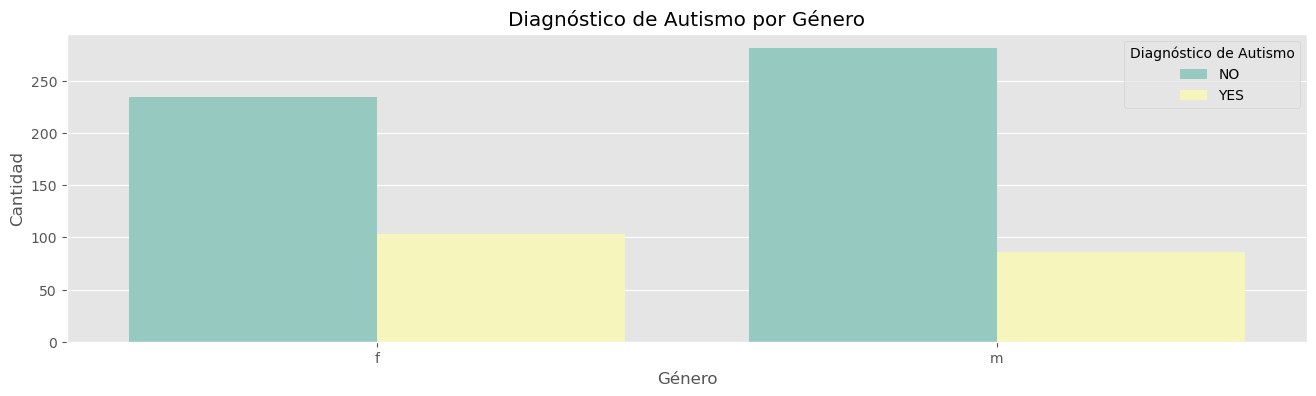

In [55]:
# 2. Gráfico de barras para Diagnóstico por Género
# Compara el diagnóstico de autismo entre géneros.
sns.countplot(x='gender', hue='Class/ASD', data=data, palette='Set3')
plt.title('Diagnóstico de Autismo por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Diagnóstico de Autismo')
plt.show()

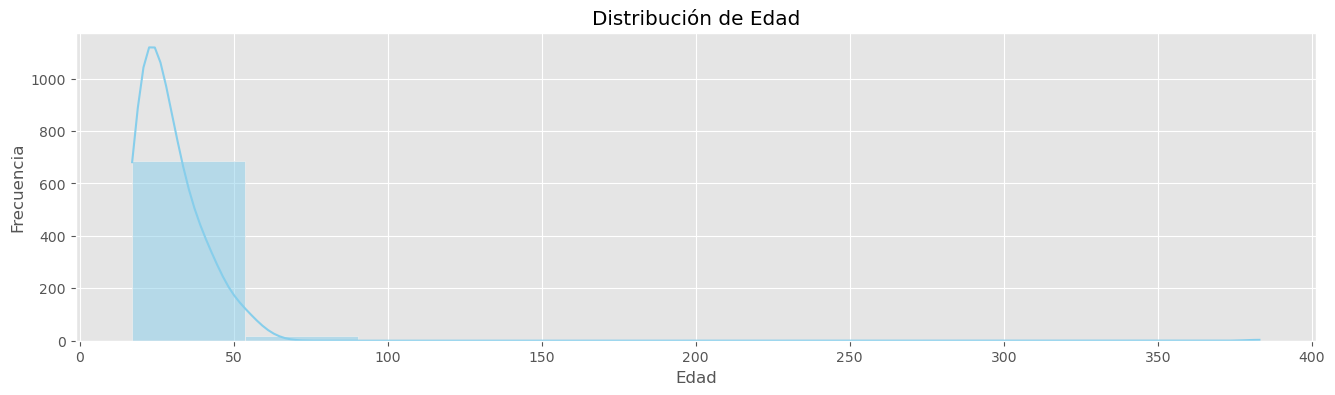

In [57]:
# 3. Histograma de Edad
# Muestra la distribución de edad de todos los participantes.
sns.histplot(data['age'], bins=10, color='skyblue', kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

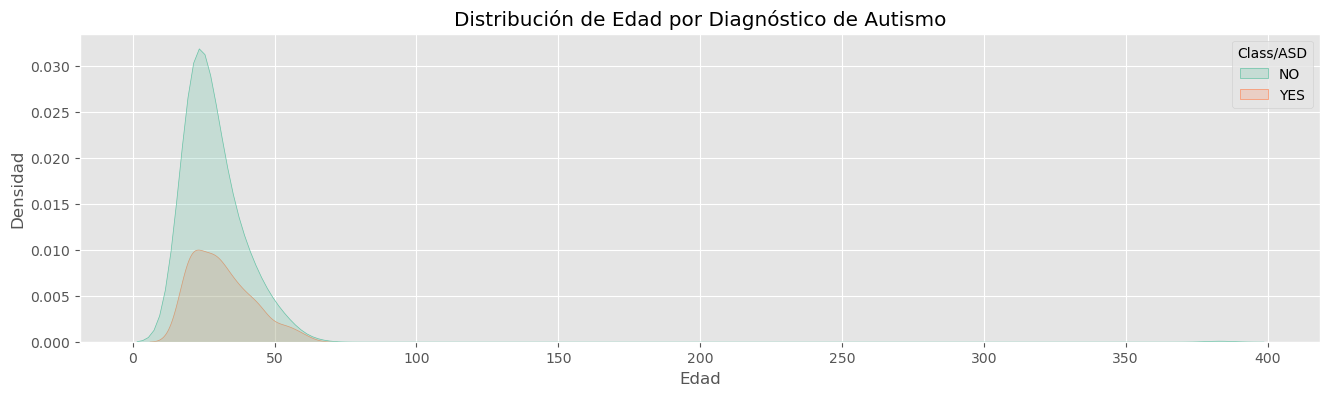

In [59]:
# 4. Histograma de densidad para Edad por Diagnóstico de Autismo
# Visualiza la distribución de edad en personas diagnosticadas y no diagnosticadas.
sns.kdeplot(data=data, x='age', hue='Class/ASD', fill=True, palette='Set2')
plt.title('Distribución de Edad por Diagnóstico de Autismo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()


# particionamiento de la data


In [61]:
#particionando la data en 0.8 para entrenar y 0.2 para validar
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_trainset.shape, y_trainset.shape)
print (X_testset.shape, y_testset.shape)

(563, 12) (563,)
(141, 12) (141,)


# Correlación de las variables

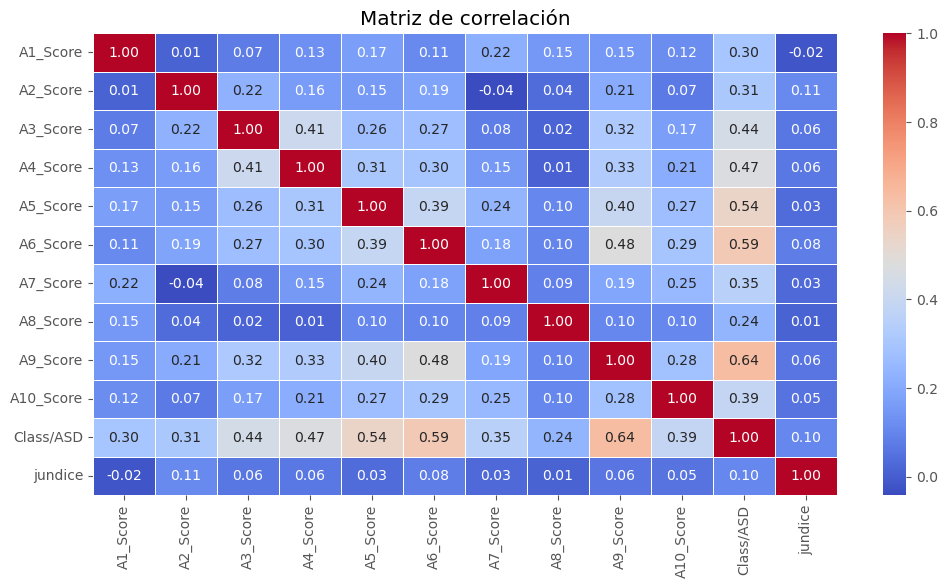

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga el DataFrame
data = pd.read_csv(r"C:/Users/MADDOX/dataset/autism_screening.csv", index_col=None)

# Convierte las columnas categóricas a numéricas
data['Class/ASD'] = data['Class/ASD'].map({'YES': 1, 'NO': 0})
data['jundice'] = data['jundice'].map({'yes': 1, 'no': 0})  # Conversión de 'yes' y 'no' a 1 y 0

# Selecciona solo las columnas numéricas
data_numeric = data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                     'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Class/ASD', 'jundice']]

# Calcula la correlación con el método de Pearson
corr_df = data_numeric.corr(method='pearson')

# Configuración del gráfico de calor de la matriz de correlación
plt.figure(figsize=(12, 6))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

# Modelo SVC

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Cargar datos
data = pd.read_csv(r"C:/Users/MADDOX/dataset/autism_screening.csv", index_col=None)

# Convertir las columnas categóricas a numéricas
data['Class/ASD'] = data['Class/ASD'].map({'YES': 1, 'NO': 0})
data['jundice'] = data['jundice'].map({'yes': 1, 'no': 0})  # Conversión de 'yes' y 'no' a 1 y 0

# Seleccionar características y etiquetas
X = data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
           'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 
           'age', 'jundice']].values
y = data['Class/ASD']

# Dividir los datos en conjunto de entrenamiento y prueba
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=0)

# Imputar valores NaN
imputer = SimpleImputer(strategy='mean')
X_trainset = imputer.fit_transform(X_trainset)
X_testset = imputer.transform(X_testset)

# Definir la cuadrícula de parámetros para la búsqueda de hiperparámetros en SVM
param_grid = {'C': [0.1, 1, 10, 200, 1000], 
              'gamma': ['scale', 'auto'],
              'kernel': ['rbf']}
  
grid = GridSearchCV(SVC(probability=True), 
                    param_grid, 
                    refit=True, 
                    verbose=3, 
                    cv=5)

# Ajustar GridSearchCV
grid.fit(X_trainset, y_trainset)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.743 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.743 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.735 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.741 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.741 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.743 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.743 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.735 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.741 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.741 total time=   0.0s
[CV 1/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.743 total time=   0.0s
[CV 2/5] END ......C=1, gamma=scale, kernel=rbf;

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 200, 1000],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
             verbose=3)

cv: 2
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
Matthews: 1.0


cv: 3
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
Matthews: 1.0


cv: 4
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
Matthews: 1.0


cv: 5
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
Matthews: 1.0


cv: 6
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
Matthews: 1.0


cv: 7
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
Matthews: 1.0


cv: 8
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
Matthews: 1.0


cv: 9
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
Matthews: 1.0


cv: 10
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
Matthews: 1.0


cv: 11
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC: 1.0
Matthews: 1.0




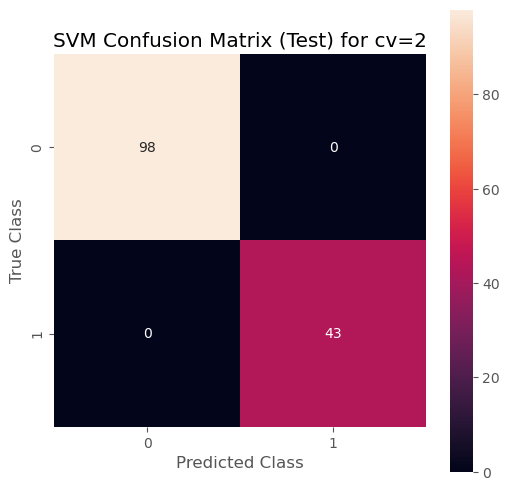

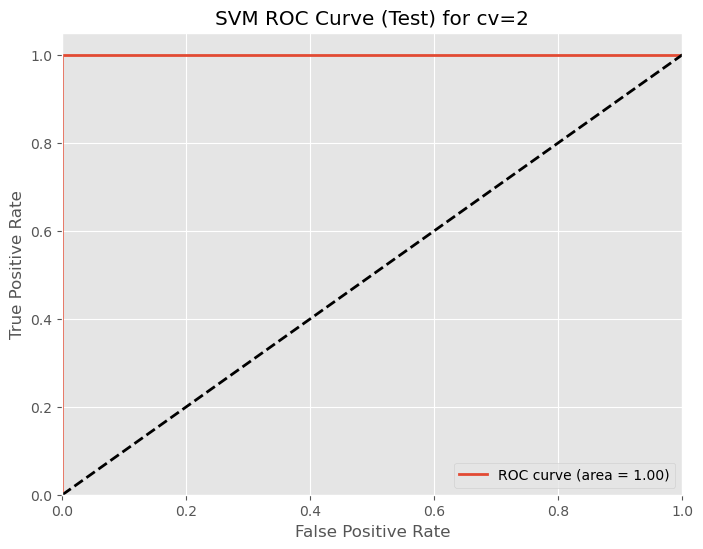

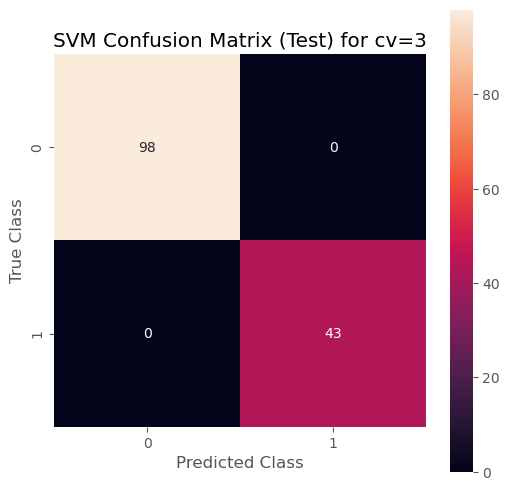

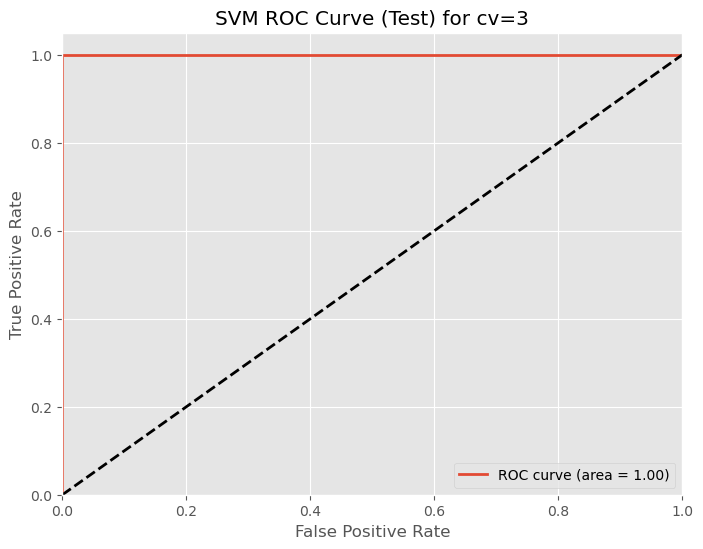

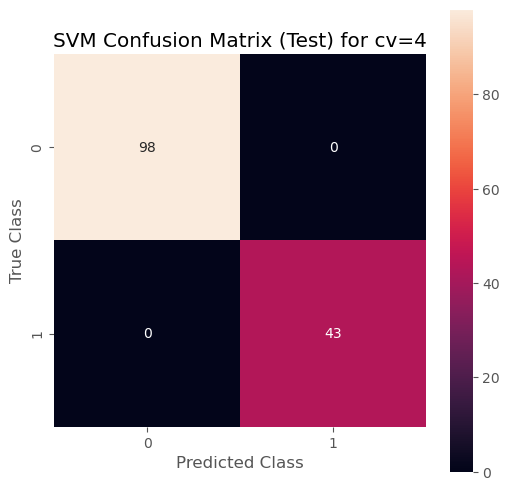

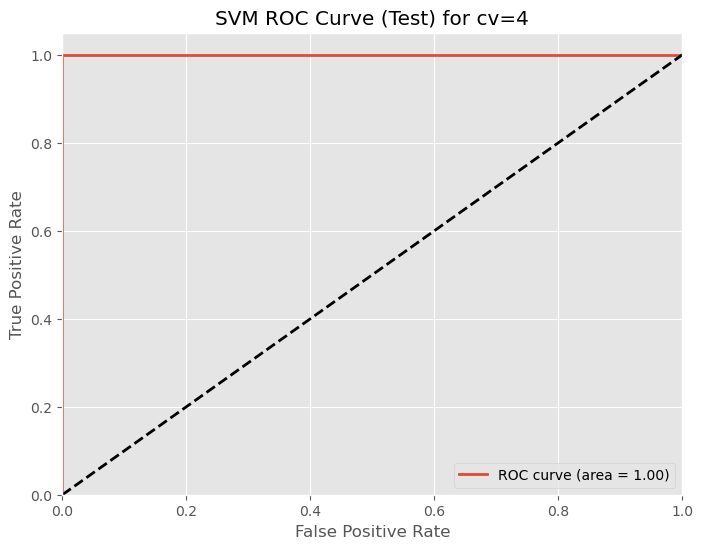

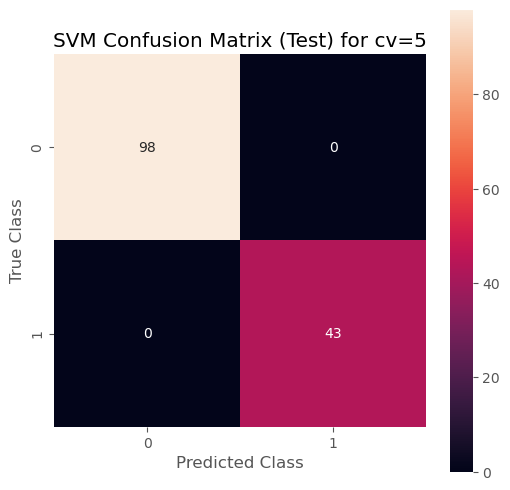

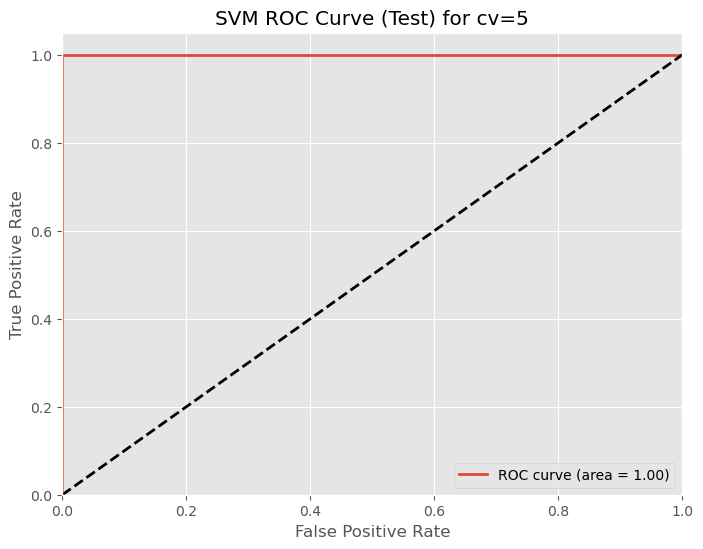

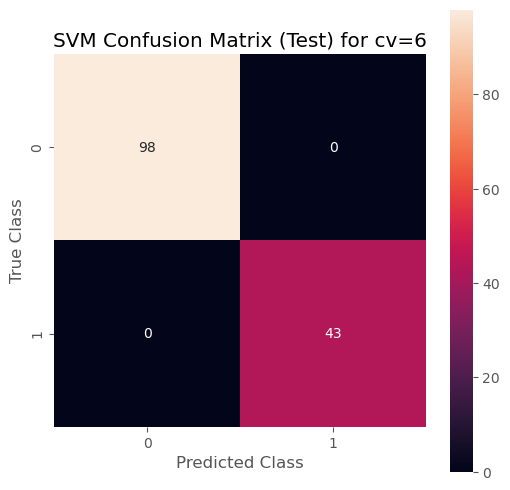

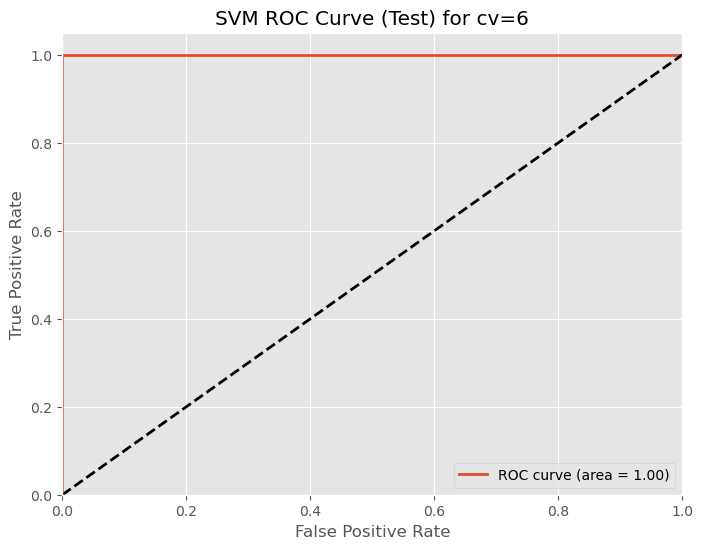

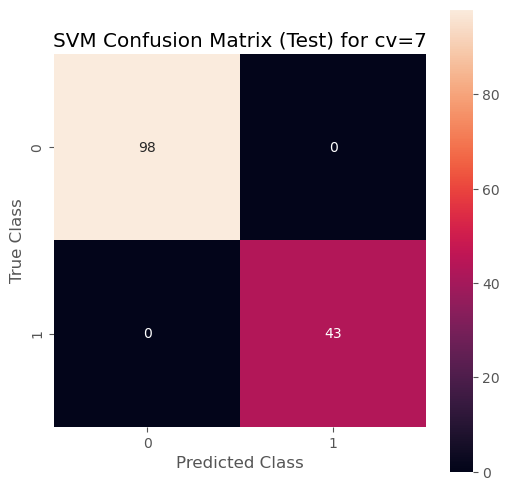

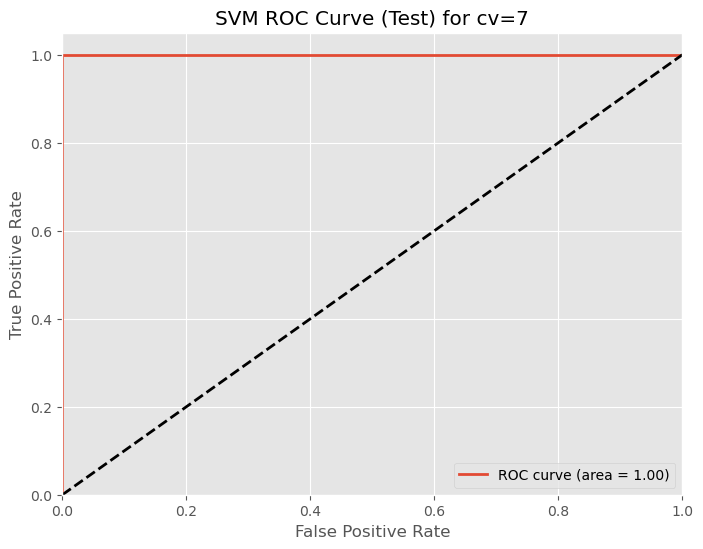

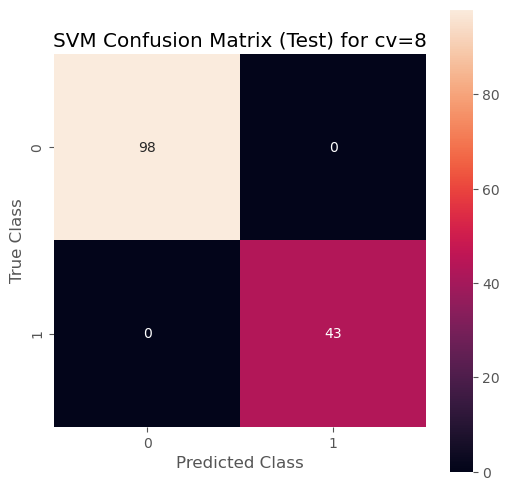

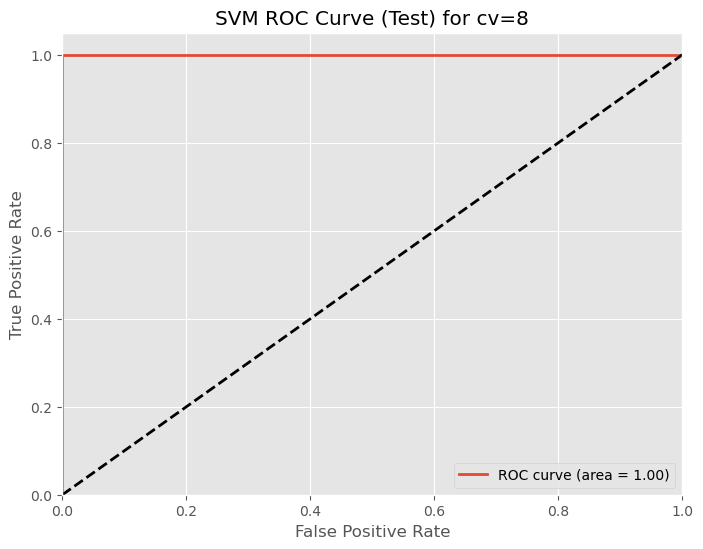

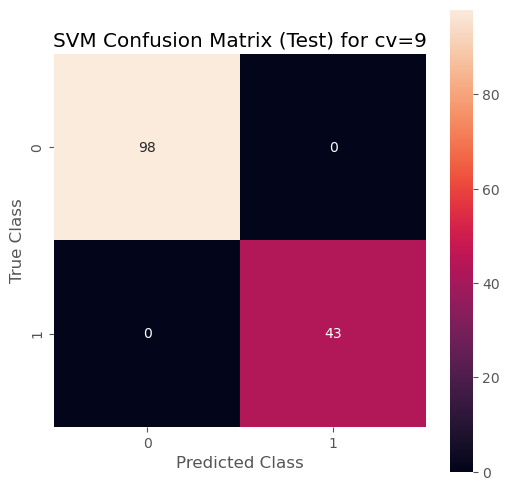

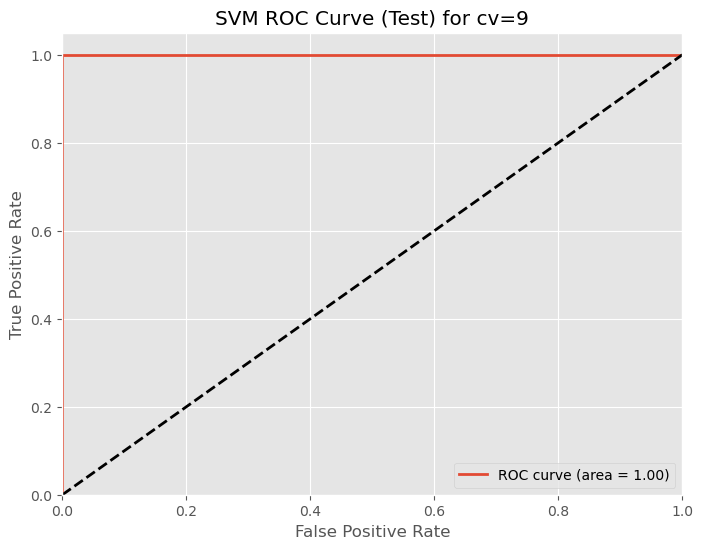

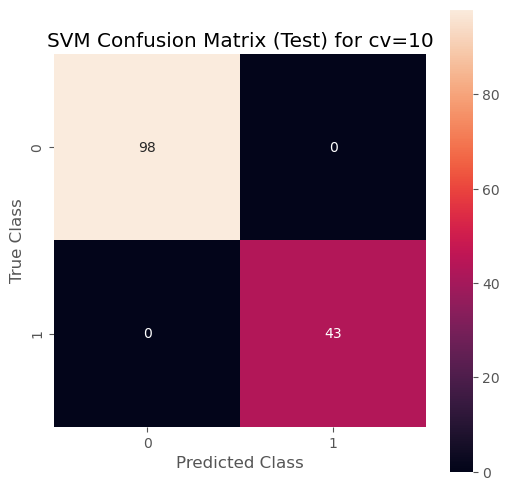

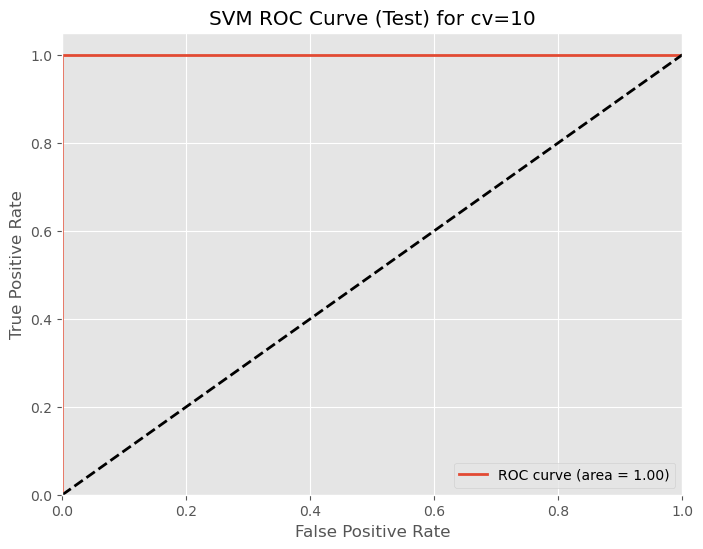

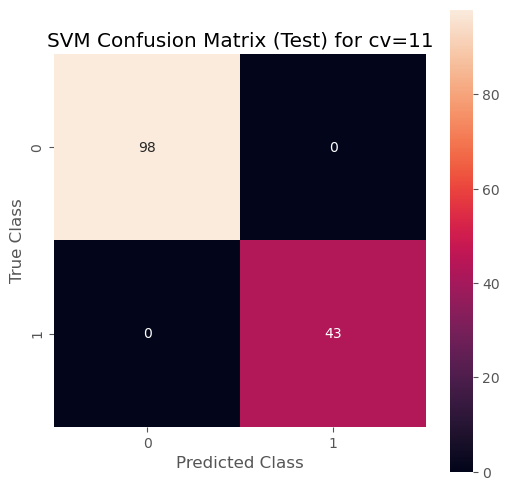

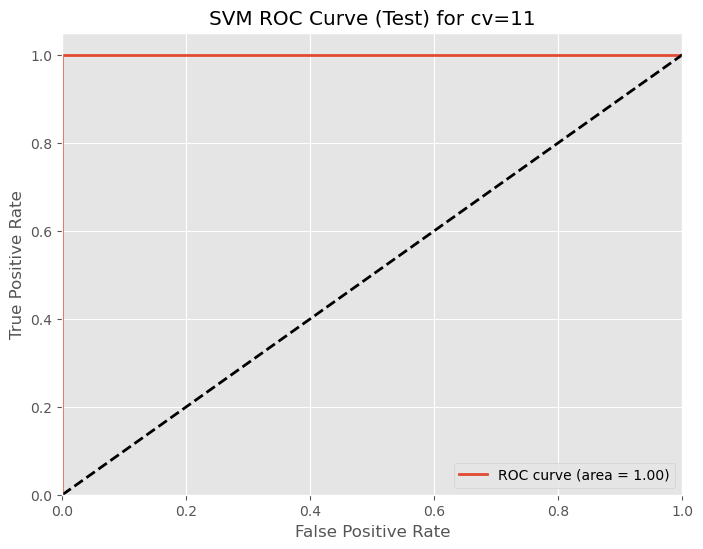

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings("ignore")

# Cargar datos
data = pd.read_csv(r"C:/Users/MADDOX/dataset/autism_screening.csv")

# Convertir columnas categóricas a numéricas
data['Class/ASD'] = data['Class/ASD'].map({'YES': 1, 'NO': 0})
data['jundice'] = data['jundice'].map({'yes': 1, 'no': 0})

# Seleccionar características y etiquetas
X = data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
           'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 
           'age', 'jundice']].values
y = data['Class/ASD']

# Dividir los datos en conjunto de entrenamiento y prueba
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=0)

# Imputar valores NaN
imputer = SimpleImputer(strategy='mean')
X_trainset = imputer.fit_transform(X_trainset)
X_testset = imputer.transform(X_testset)

# Definir la cuadrícula de parámetros para la búsqueda de hiperparámetros en SVM
param_grid = {
    'C': [0.1, 1, 10, 200, 1000],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

# Lista para almacenar los resultados
resultados = []

# Bucle para probar diferentes valores de cv en la búsqueda de hiperparámetros
for i in range(2, 12):
    # Crear un objeto GridSearchCV con SVC y el valor actual de cv
    grid_search = GridSearchCV(SVC(probability=True), param_grid, refit=True, cv=i, verbose=0)
    
    # Entrenar el modelo para buscar los mejores parámetros
    grid_search.fit(X_trainset, y_trainset)

    # Predecir con el mejor modelo encontrado
    pred_Y1 = grid_search.predict(X_testset)

    # Calcular las métricas de clasificación
    accuracy = accuracy_score(y_testset, pred_Y1)
    precision = precision_score(y_testset, pred_Y1, average='binary')
    recall = recall_score(y_testset, pred_Y1, average='binary')
    f1 = f1_score(y_testset, pred_Y1, average='binary')
    roc_auc = roc_auc_score(y_testset, grid_search.predict_proba(X_testset)[:, 1])
    matthews = matthews_corrcoef(y_testset, pred_Y1)

    # Guardar los resultados en la lista
    resultados.append({
        "cv": i,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 score": f1,
        "ROC AUC": roc_auc,
        "Matthews": matthews,
        "Predicciones": pred_Y1
    })

# Imprimir las métricas al final
for resultado in resultados:
    print(f"cv: {resultado['cv']}")
    print("Accuracy:", resultado["Accuracy"])
    print("Precision:", resultado["Precision"])
    print("Recall:", resultado["Recall"])
    print("F1 score:", resultado["F1 score"])
    print("ROC AUC:", resultado["ROC AUC"])
    print("Matthews:", resultado["Matthews"])
    print("\n")

# Generar las matrices de confusión y curvas ROC al final
for resultado in resultados:
    # Matriz de confusión
    plt.figure(figsize=(6, 6))  # Establecer un tamaño constante
    cnf_matrix = pd.crosstab(y_testset, resultado['Predicciones'], rownames=['ACTUAL'], colnames=['Prediccion'])
    sb.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title(f'SVM Confusion Matrix (Test) for cv={resultado["cv"]}')
    plt.show()

    # Curva ROC
    plt.figure(figsize=(8, 6))  # Establecer un tamaño constante para la curva ROC
    y_prob = grid_search.predict_proba(X_testset)[:, 1]
    fpr, tpr, _ = roc_curve(y_testset, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'SVM ROC Curve (Test) for cv={resultado["cv"]}')
    plt.legend(loc="lower right")
    plt.show()



In [71]:
# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid.best_params_)

Mejores parámetros: {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}


In [73]:
model = grid.best_estimator_
model

SVC(C=1000, probability=True)

In [75]:
# validación cruzada
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 10)
scores = cross_val_score(model, X_trainset,y_trainset, cv = k_folds)
print(scores)

model.fit(X_trainset,y_trainset)

[1.         1.         1.         0.98214286 1.         1.
 1.         1.         1.         1.        ]


SVC(C=1000, probability=True)

## Métricas del Modelo (Train)

In [78]:
pred = model.predict(X_trainset)

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [82]:
#Metricas del modelo
from sklearn.metrics import accuracy_score
print('el accuracy es :',accuracy_score(y_trainset, pred))

#Recall - sensibilidad
from sklearn.metrics import recall_score
print ('la sensibilidad es : ',recall_score(y_trainset, pred, average='macro'))

#f1_score
from sklearn.metrics import f1_score
print('el f1_score es: ', f1_score(y_trainset, pred, average='macro'))

#precision
from sklearn.metrics import precision_score
print('la precision es :',precision_score(y_trainset, pred, average='macro'))

el accuracy es : 1.0
la sensibilidad es :  1.0
el f1_score es:  1.0
la precision es : 1.0


In [84]:
print(classification_report(y_trainset, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       417
           1       1.00      1.00      1.00       146

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563



In [86]:
matrix_de_confussion = pd.crosstab(y_trainset, pred, rownames = ['ACTUAL'],colnames=['PREDICCION'])
print(matrix_de_confussion)

PREDICCION    0    1
ACTUAL              
0           417    0
1             0  146


In [88]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 5)

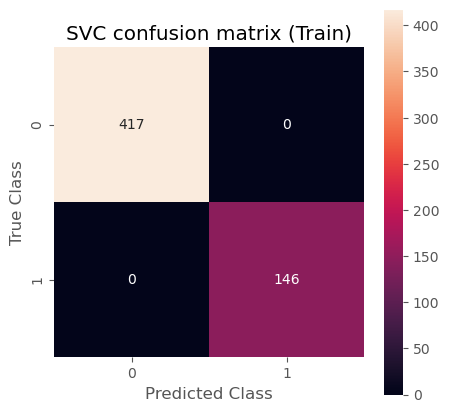

In [90]:
import seaborn as sb

cnf_matrix= pd.crosstab(y_trainset, pred, rownames = ['ACTUAL'],colnames=['Prediccion'])
sb.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('SVC confusion matrix (Train)')

plt.show()

## Métricas del Modelo (Test)

In [93]:
pred = model.predict(X_testset)

In [95]:
#Metricas del modelo
from sklearn.metrics import accuracy_score
print('el accuracy es :',accuracy_score(y_testset, pred))

#Recall - sensibilidad
from sklearn.metrics import recall_score
print ('la sensibilidad es : ',recall_score(y_testset, pred, average='macro'))

#f1_score
from sklearn.metrics import f1_score
print('el f1_score es: ', f1_score(y_testset, pred, average='macro'))

#precision
from sklearn.metrics import precision_score
print('la precision es :',precision_score(y_testset, pred, average='macro'))

el accuracy es : 1.0
la sensibilidad es :  1.0
el f1_score es:  1.0
la precision es : 1.0


In [97]:
print(classification_report(y_testset, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        43

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [99]:
matrix_de_confussion = pd.crosstab(y_testset, pred, rownames = ['ACTUAL'],colnames=['PREDICCION'])
print(matrix_de_confussion)

PREDICCION   0   1
ACTUAL            
0           98   0
1            0  43


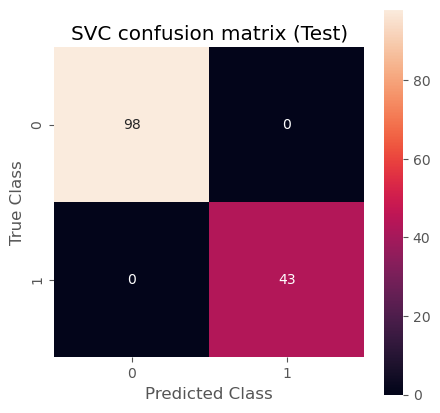

In [101]:
cnf_matrix= pd.crosstab(y_testset, pred, rownames = ['ACTUAL'],colnames=['Prediccion'])
sb.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('SVC confusion matrix (Test)')
plt.show()

In [103]:
plt.rcParams["figure.figsize"] = (4, 4)

## ROC Curve (Train)

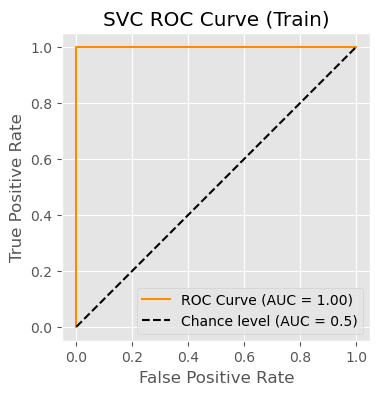

In [106]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from itertools import cycle

probs = model.predict_proba(X_trainset)
probs = probs[:,1]

RocCurveDisplay.from_predictions(
    y_trainset,
    probs,
    name="ROC Curve",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVC ROC Curve (Train)")
plt.legend()
plt.show()

## ROC Curve (Test)

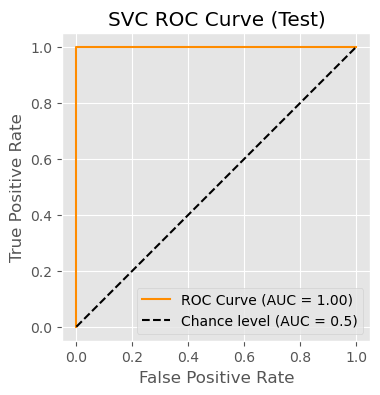

In [109]:
probs = model.predict_proba(X_testset)
probs = probs[:,1]

RocCurveDisplay.from_predictions(
    y_testset,
    probs,
    name="ROC Curve",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVC ROC Curve (Test)")
plt.legend()
plt.show()

## Precision Recall Curve (Train)

1.0


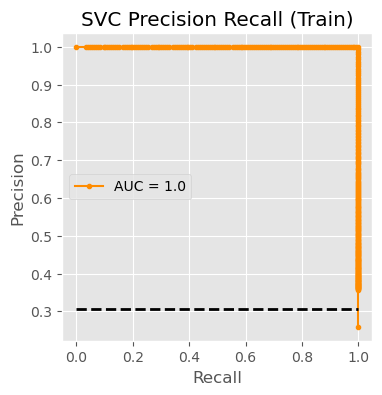

In [112]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from sklearn.metrics import precision_recall_curve, auc

probs = model.predict_proba(X_trainset)
probs = probs[:,1]

lr_precision, lr_recall, _ = precision_recall_curve(y_trainset, probs)
roc_auc = auc(lr_recall, lr_precision)
print(roc_auc)

plt.plot(lr_recall, lr_precision, marker='.', label='AUC = {0}'.format(roc_auc.round(2)), color='darkorange')

no_skill = len(y_testset[y_testset==1]) / len(y_testset)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
# show the legend
plt.legend(loc='best')
plt.title('SVC Precision Recall (Train)')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
# show the plot
plt.show()

## Precision Recall Curve (Test)

1.0


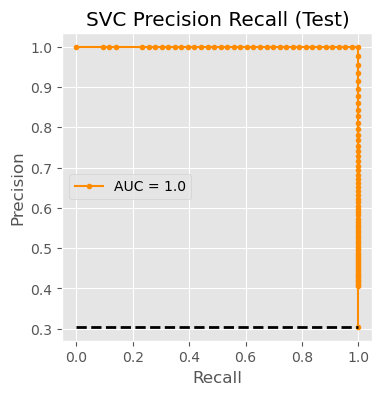

In [115]:
probs = model.predict_proba(X_testset)
probs = probs[:,1]

lr_precision, lr_recall, _ = precision_recall_curve(y_testset, probs)
roc_auc = auc(lr_recall, lr_precision)
print(roc_auc)

plt.plot(lr_recall, lr_precision, marker='.', label='AUC = {0}'.format(roc_auc.round(2)), color='darkorange')

no_skill = len(y_testset[y_testset==1]) / len(y_testset)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
# show the legend
plt.legend(loc='best')
plt.title('SVC Precision Recall (Test)')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
# show the plot
plt.show()

In [117]:
import pickle
pickle.dump(model, open('./models/svm_hp.pkl', 'wb'))